### LSE Data Analytics Online Career Accelerator 

# DA201:  Data Analytics with Python

# Questions to guide the visualisation workflow
The marketing team has a few ideas for the campaign. They’re hoping to create an advert that will speak to the spirit of competition and show that people of all ages, genders, and abilities can run the marathon. One approach that they are considering is to select a specific runner from the data within a specific group. This person should be someone who has performed exceptionally well within their category. The visual exploration will aim to better understand what the runners are capable of and, therefore, what is considered exceptional. The organisers have posed four questions to guide the exploration and flow:

- What is the spread of data?
- What is the spread of male marathon runners?
- What is the spread of female marathon runners?
- What is the relationship between gender and race time?

### 1. Import libraries and create a DataFrame

In [1]:
# Import Matplotlib, Seaborn, Numpy, Pandas, and DateTime.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

# Import the csv file.
marathon = pd.read_csv('marathon_results.csv')

# View the DataFrame.
print(marathon.shape)
print(marathon.columns)
marathon.head()

(26410, 25)
Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')


,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


### 2. Convert time to integers

In [2]:
# Ensure the variables of interest are numeric.
marathon['official_time'] = pd.to_timedelta(marathon['Official Time'])

# Calculate the number of seconds.
marathon['official_time_seconds'] = marathon['official_time'].dt.seconds

# Calculate the number of minutes.
marathon['official_time_minutes'] = marathon['official_time_seconds']/60

# View the DataFrame.
marathon.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,official_time,official_time_seconds,official_time_minutes
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,2:02:53,0:04:57,-,2:09:37,1,1,1,0 days 02:09:37,7777,129.616667
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,2:03:14,0:04:58,-,2:09:58,2,2,2,0 days 02:09:58,7798,129.966667
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,2:03:38,0:04:59,-,2:10:28,3,3,3,0 days 02:10:28,7828,130.466667
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,2:04:35,0:05:03,-,2:12:08,4,4,4,0 days 02:12:08,7928,132.133333
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,2:05:00,0:05:04,-,2:12:35,5,5,5,0 days 02:12:35,7955,132.583333


### 3. What is the spread of data?

(array([ 590.,  876., 1119., 1470., 1663., 2061., 2139., 2313., 2291.,
        1951., 1604., 1482., 1254., 1100.,  937.,  892.,  768.,  703.,
         635.,  562.]),
 array([   0. ,  463.4,  926.8, 1390.2, 1853.6, 2317. , 2780.4, 3243.8,
        3707.2, 4170.6, 4634. , 5097.4, 5560.8, 6024.2, 6487.6, 6951. ,
        7414.4, 7877.8, 8341.2, 8804.6, 9268. ]),
 <BarContainer object of 20 artists>)

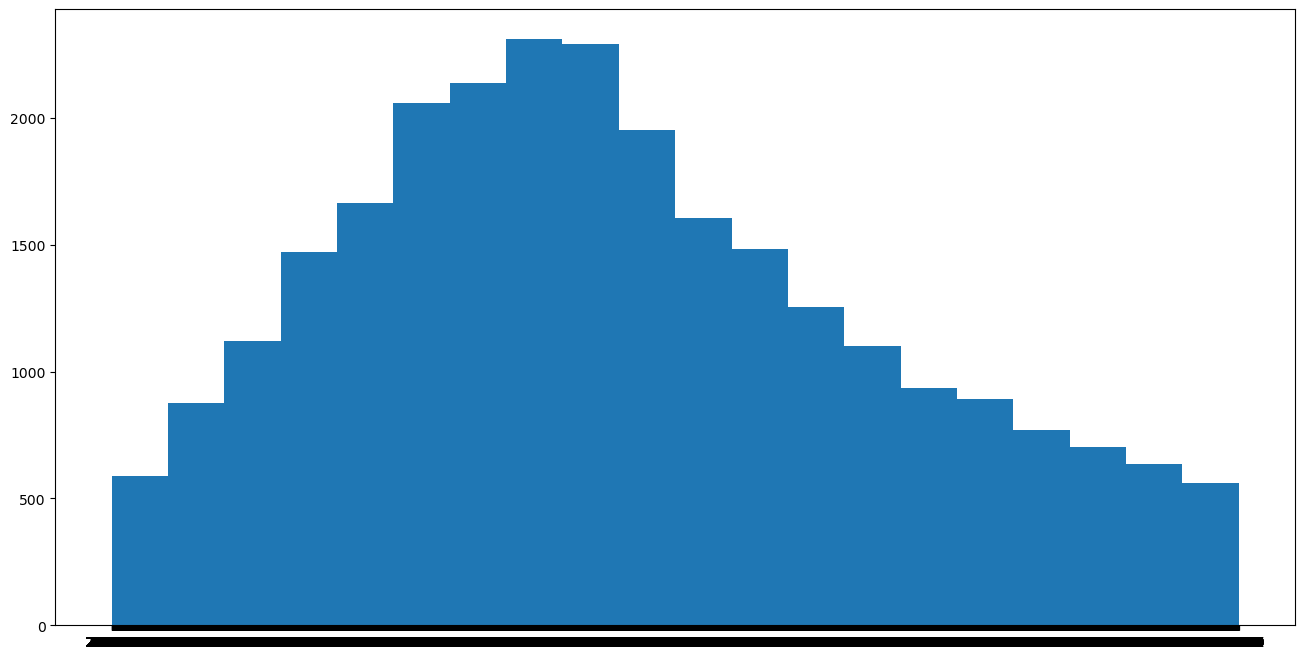

In [3]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# Create a histogram.
ax.hist(marathon['Official Time'], bins=20)

### 4. What is the spread of male marathon runners?

(array([ 441.,  586.,  774.,  927.,  951., 1010., 1048.,  971.,  955.,
         917.,  896.,  742.,  637.,  634.,  591.,  531.,  520.,  466.,
         437.,  404.]),
 array([   0. ,  363.3,  726.6, 1089.9, 1453.2, 1816.5, 2179.8, 2543.1,
        2906.4, 3269.7, 3633. , 3996.3, 4359.6, 4722.9, 5086.2, 5449.5,
        5812.8, 6176.1, 6539.4, 6902.7, 7266. ]),
 <BarContainer object of 20 artists>)

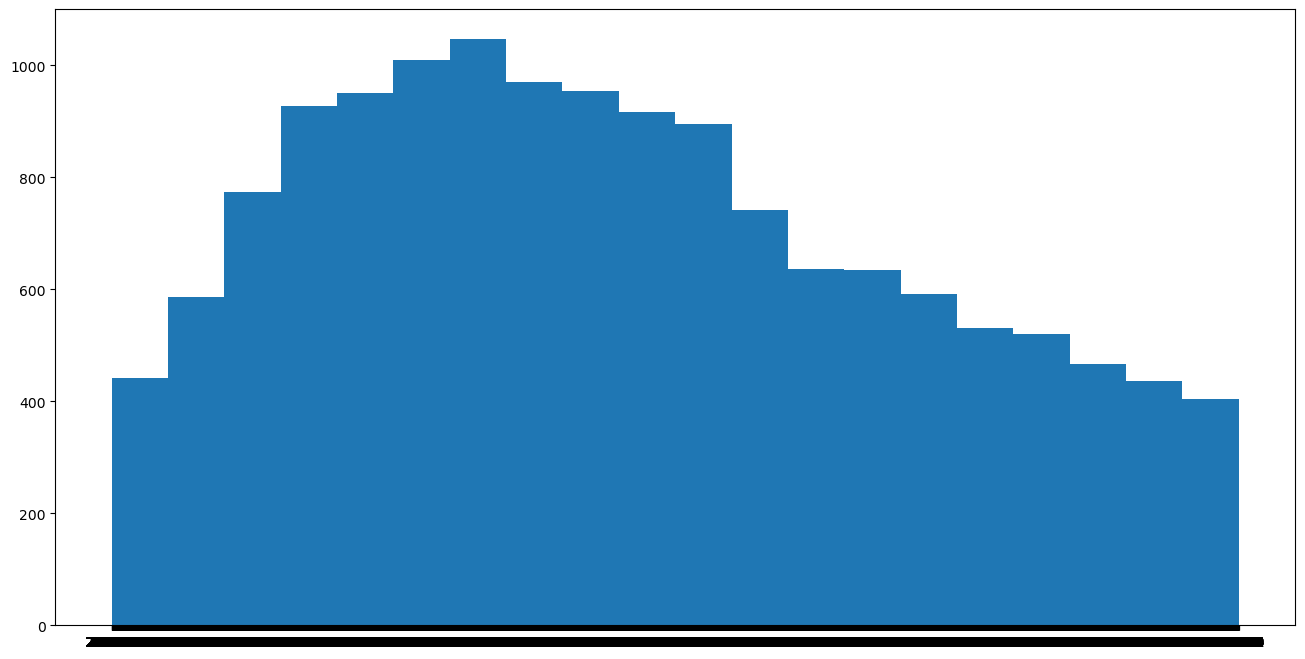

In [4]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# Create a variable for the x-values.
males = marathon[marathon['M/F'] == 'M']

# Create a histogram.
ax.hist(males['Official Time'], bins=20)

### 5. What is the spread of female marathon runners?

(array([358., 446., 591., 705., 767., 849., 918., 911., 785., 705., 704.,
        652., 551., 516., 475., 464., 438., 395., 393., 349.]),
 array([   0.  ,  309.25,  618.5 ,  927.75, 1237.  , 1546.25, 1855.5 ,
        2164.75, 2474.  , 2783.25, 3092.5 , 3401.75, 3711.  , 4020.25,
        4329.5 , 4638.75, 4948.  , 5257.25, 5566.5 , 5875.75, 6185.  ]),
 <BarContainer object of 20 artists>)

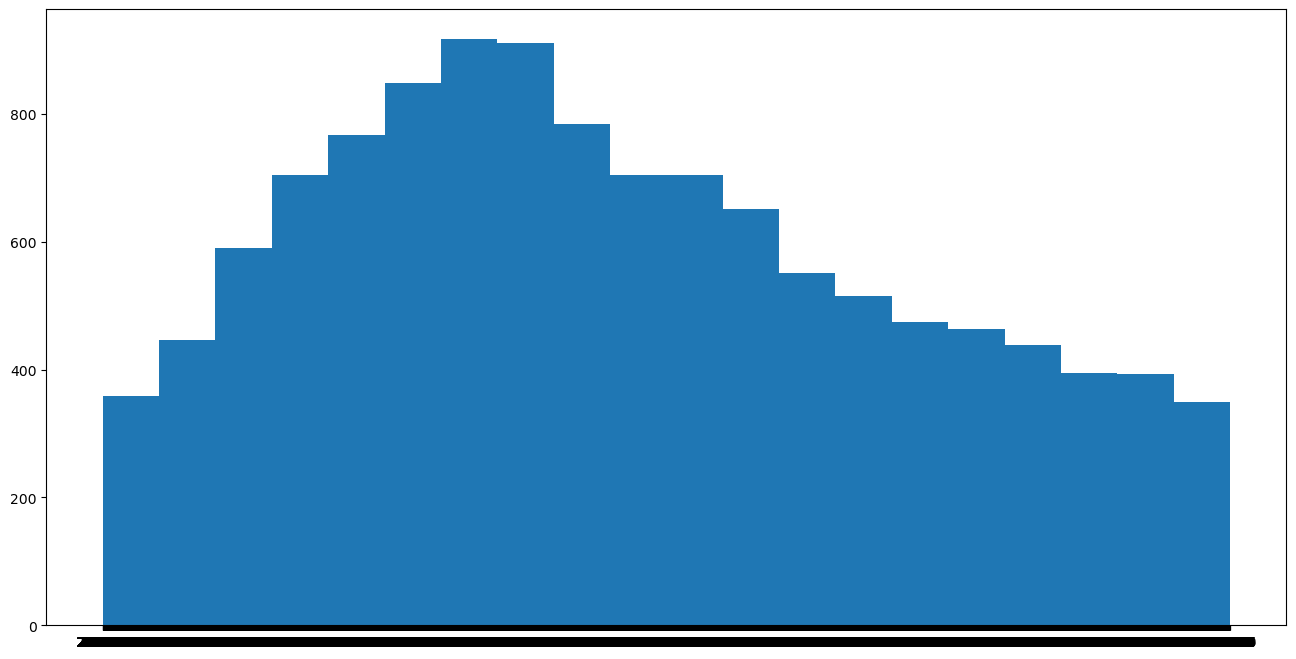

In [5]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# Create a variable for the x-values.
females = marathon[marathon['M/F'] == 'F']

# Create a histogram.
ax.hist(females['Official Time'], bins=20)

### 6. What is the relationship between gender and race times?

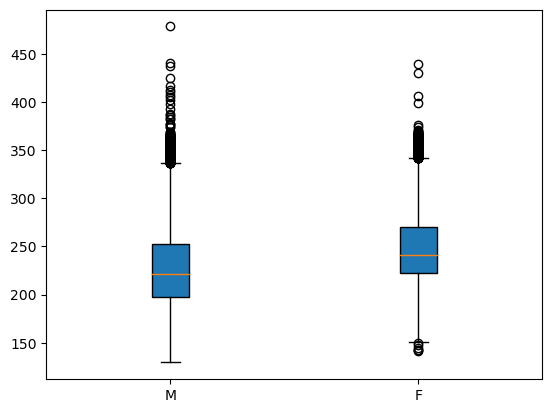

In [6]:
# Create a data set for males and females to use in the matplotlib boxplot.
males = marathon[marathon['M/F'] == 'M']
females = marathon[marathon['M/F'] == 'F']

# Create a variable for the boxplot.
males = males['official_time_minutes']
females = females['official_time_minutes']

# Create a boxplot using Matplotlib.
plt.boxplot([males,females], labels=['M','F'], patch_artist=True)

# View the boxplot.
plt.show()

<Axes: xlabel='M/F', ylabel='official_time_minutes'>

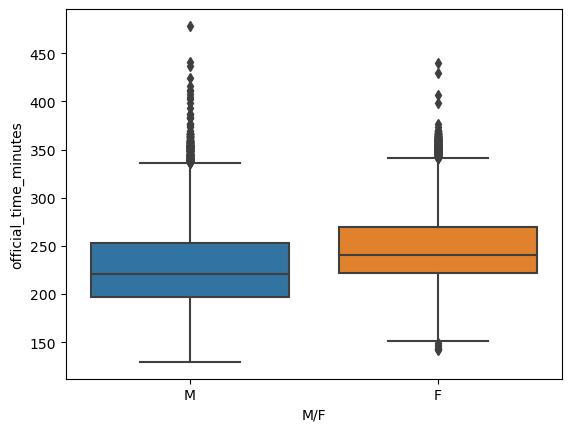

In [7]:
# Create a second boxplot using Seaborn.
sns.boxplot(x='M/F', y='official_time_minutes', data=marathon)

# Conclusion
We can report back to the organisers that:

- Depending on the number of participants, the male data points have a wider spread than the female data points.

- The minimum of the males is much lower than the females, indicating the males were faster. However, the maximum of both females and males are closely grouped.

- The median of the male participants is lower than the female participants. Indicating that the males were indeed faster than the females.

- The IQR (interquartile range) looks similar for both males and females.

- The male outliers are more concentrated on the 'slower' side than females. The female participants have outliers that compare well to the faster male participants.
